In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
import re

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
sns.set(font_scale=1)

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

### Action Plan
1. Read data and create Validation set
2. Explore dataset with visualizations
3. Feature Engineering
4. Train model
5. Generate predictions
6. Validate predictions
7. Submit predictions to Kaggle

### 1. Reading data 

In [10]:
cd data/

/home/shubham/work/projects/two_sigma_rental/data


In [11]:
ls

test.json.zip  train.json.zip


In [12]:
!unzip train.json.zip
!unzip test.json.zip

Archive:  train.json.zip
  inflating: train.json              
Archive:  test.json.zip
  inflating: test.json               


In [13]:
!rm train.json.zip test.json.zip

In [17]:
cd ..

/home/shubham/work/projects/two_sigma_rental


In [2]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

In [3]:
train['flag'] = 'train'
test['flag'] = 'test'
full_data = pd.concat([train,test])

### 2. Explore dataset with visualizations

In [5]:
full_data.head(2).T

,10,10000
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow..."
flag,train,train
interest_level,medium,low
latitude,40.7145,40.7947


In [32]:
test.head().T

,0,1,100,1000,100000
bathrooms,1,1,1,1,2
bedrooms,1,2,1,2,2
building_id,79780be1514f645d7e6be99a3de696c5,0,3dbbb69fd52e0d25131aa1cd459c87eb,783d21d013a7e655bddc4ed0d461cc5e,6134e7c4dd1a98d9aee36623c9872b49
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-03 04:29:40,2016-06-11 06:17:35,2016-04-12 05:24:17
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,New York chic has reached a new level ...,Step into this fantastic new Construction in t...,"~Take a stroll in Central Park, enjoy the ente..."
display_address,Suffolk Street,Thompson Street,101 East 10th Street,South Third Street\r,"Midtown West, 8th Ave"
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Doorman, Elevator, No Fee]","[Roof Deck, Balcony, Elevator, Laundry in Buil...","[Common Outdoor Space, Cats Allowed, Dogs Allo..."
latitude,40.7185,40.7278,40.7306,40.7109,40.765
listing_id,7142618,7210040,7103890,7143442,6860601
longitude,-73.9865,-74,-73.989,-73.9571,-73.9845


In [26]:
test.shape

(74659, 14)

In [9]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

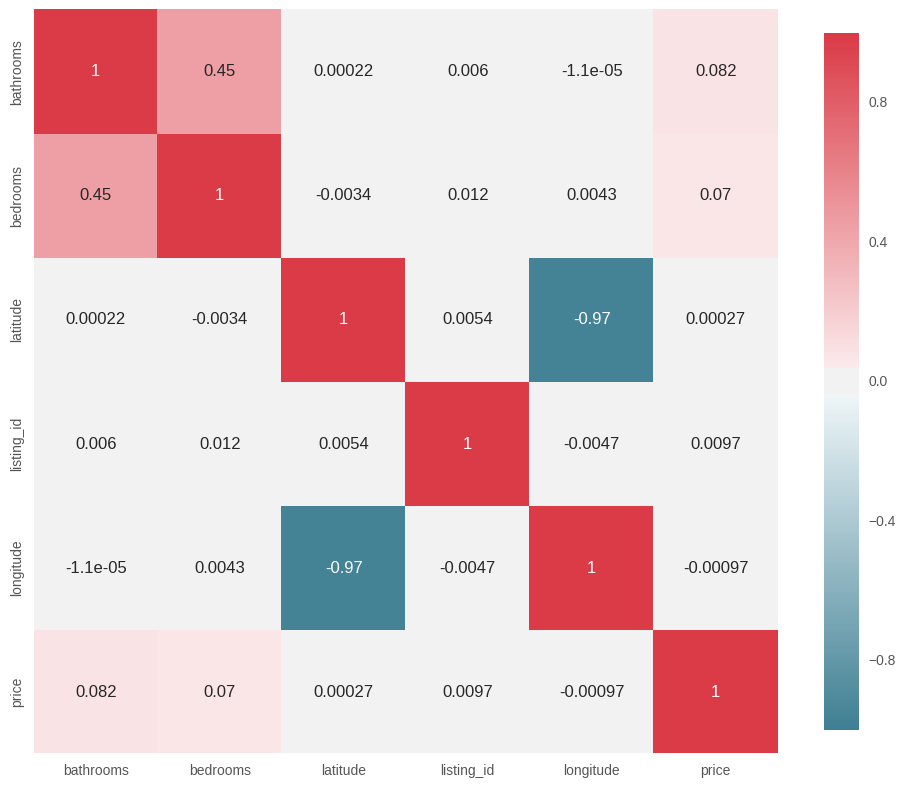

In [10]:
plot_correlation_map(full_data)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 16 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
flag               49352 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 6.4+ MB


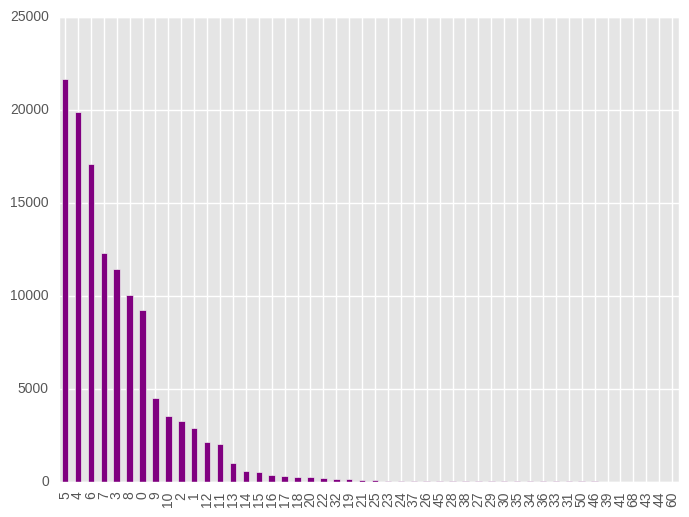

In [16]:
Features based on date

full_data.num_photos.value_counts().plot(kind='bar',color='purple')

### 3. Feature Engineering

Text features

In [11]:
full_data['num_photos'] = full_data['photos'].apply(len)
full_data['num_features'] = full_data['features'].apply(len)
full_data['num_description_words'] = full_data['description'].apply(lambda x: len(x.split(' ')))
full_data['num_description_len'] = full_data['description'].apply(len)

Date features

In [73]:
full_data['created'] = pd.to_datetime(full_data['created'])
full_data['num_created_weekday'] = full_data.created.dt.dayofweek.astype(float)
full_data['num_created_weekofyear'] = full_data.created.dt.weekofyear

Making the number of photos column equal to 15 if photos are greater than 15

In [17]:
full_data['num_photos'].ix[full_data['num_photos']>15] = 15

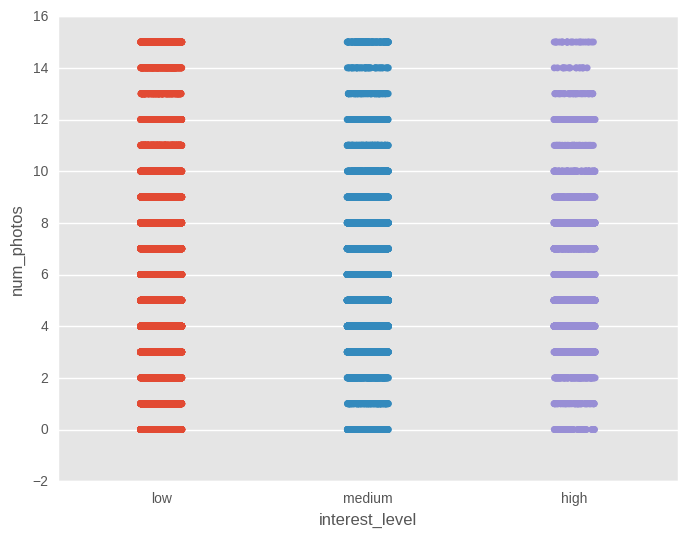

In [18]:
order = ['low', 'medium', 'high']
sns.stripplot(y="num_photos", x="interest_level",data=full_data,jitter=True,order=order)

High profile managers

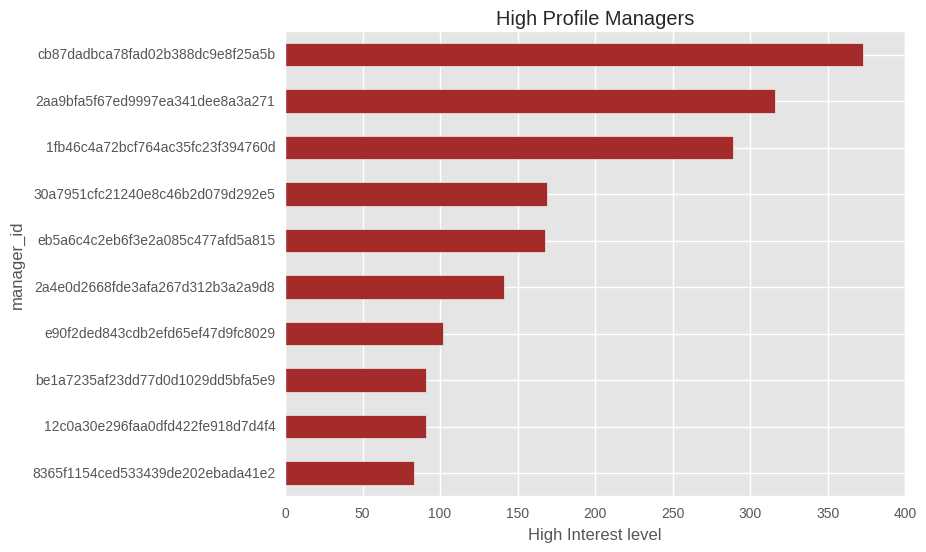

In [62]:
managerDF = full_data.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
managerDF["sum"]=managerDF.sum(axis=1)
x=managerDF[ (managerDF['sum'] > 80) & (managerDF['high'] > 30)]
managerDF.head()
x.sort_values("sum",inplace=True)
plt.title("High Profile Managers")
plt.xlabel("High Interest level")
plt.ylabel("Manager ID")
x = x[x.index != 'e6472c7237327dd3903b3d6f6a94515a']
x["sum"].plot(kind='barh',color="brown");

In [19]:
# Removes symbols, numbers and stem the words to reduce dimentional space
stemmer = PorterStemmer()

def clean(x):
    regex = re.compile('[^a-zA-Z ]')
    # For user clarity, broken it into three steps
    i = regex.sub(' ', x).lower()
    i = i.split(" ") 
    i= [stemmer.stem(l) for l in i]
    i= " ".join([l.strip() for l in i if (len(l)>2) ]) # Keeping words that have length greater than 2
    return i

In [20]:
full_data['description_new'] = full_data.description.apply(lambda x: clean(x))

In [21]:
full_data[['description','description_new']].head(3)

,description,description_new
10,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,brand new bedroom bath apartmentenjoy these fo...
10000,,
100004,"Top Top West Village location, beautiful Pre-w...",top top west villag locat beauti pre war build...


In [38]:
# Building null
full_data['num_building_null'] = (full_data.building_id=='0').astype(float)

In [40]:
n_min=50
precision=3

In [53]:
# Building frequency
d = np.log1p(full_data.building_id.value_counts()).to_dict()
impute = np.min(np.array(list(d.values())))
full_data['num_fbuilding'] = full_data.building_id.apply(lambda x: d.get(x, impute))

In [56]:
# Bedrooms/Bathrooms/Price
full_data['num_bathrooms'] = full_data.bathrooms.clip_upper(4)
full_data['num_bedrooms'] = full_data.bedrooms.clip_upper(5)
full_data['num_price'] = full_data.price.clip_upper(10000)
bins = full_data.price.quantile(np.arange(0.05, 1, 0.05))
full_data['num_price_q'] = np.digitize(full_data.price, bins)

In [57]:
# Manager frequency
d = np.log1p(full_data.manager_id.value_counts()).to_dict()
impute = np.min(np.array(list(d.values())))
full_data['num_fmanager'] = full_data.manager_id.apply(lambda x: d.get(x, impute))

In [60]:
full_data['num_priceXroom'] = (full_data.price / (1 + full_data.bedrooms.clip(1, 4) + 0.5*full_data.bathrooms.clip(0, 2))).values
full_data['num_even_bathrooms'] = ((np.round(full_data.bathrooms) - full_data.bathrooms)==0).astype(float)

In [61]:
# Features/Description Features
bows = {'nofee': ['no fee', 'no-fee', 'no  fee', 'nofee', 'no_fee'],
        'lowfee': ['reduced_fee', 'low_fee','reduced fee', 'low fee'],
        'furnished': ['furnished'],
        'parquet': ['parquet', 'hardwood'],
        'concierge': ['concierge', 'doorman', 'housekeep','in_super'],
        'prewar': ['prewar', 'pre_war', 'pre war', 'pre-war'],
        'laundry': ['laundry', 'lndry'],
        'health': ['health', 'gym', 'fitness', 'training'],
        'transport': ['train', 'subway', 'transport'],
        'parking': ['parking'],
        'utilities': ['utilities', 'heat water', 'water included']
      }
for fname, bow in bows.items():
    x1 = full_data.description.str.lower().apply(lambda x: np.sum([1 for i in bow if i in x]))
    x2 = full_data.features.apply(lambda x: np.sum([1 for i in bow if i in ' '.join(x).lower()]))
    full_data['num_'+fname] = ((x1 + x2) > 0).astype(float).values   

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Can use tfidffvectorizer as well

cvect_desc = CountVectorizer(stop_words='english', max_features=300)
full_sparse = cvect_desc.fit_transform(full_data.description_new)
 # Renaming words to avoid collisions with other feature names in the model
col_desc = ['desc_'+ i for i in cvect_desc.get_feature_names()] 
count_vect_df = pd.DataFrame(full_sparse.todense(), columns=col_desc)
full_data = pd.concat([full_data.reset_index(),count_vect_df],axis=1)

In [87]:
feats = [i for i in full_data.columns.values if i.startswith('num_')]
feats.append('interest_level')
feats.append('flag')

In [88]:
feats

['num_photos',
 'num_features',
 'num_description_words',
 'num_description_len',
 'num_building_null',
 'num_fbuilding',
 'num_bathrooms',
 'num_bedrooms',
 'num_price',
 'num_price_q',
 'num_fmanager',
 'num_priceXroom',
 'num_even_bathrooms',
 'num_laundry',
 'num_furnished',
 'num_utilities',
 'num_concierge',
 'num_parking',
 'num_lowfee',
 'num_nofee',
 'num_transport',
 'num_prewar',
 'num_health',
 'num_parquet',
 'num_created_weekday',
 'num_created_weekofyear',
 'interest_level',
 'flag']

In [89]:
len(feats)

28

Keeping only relevant features

In [90]:
relevant_data = full_data[feats]

In [91]:
relevant_data.head(2).T

,0,1
num_photos,5,11
num_features,0,5
num_description_words,95,9
num_description_len,588,8
num_building_null,0,0
num_fbuilding,1.79176,3.95124
num_bathrooms,1.5,1
num_bedrooms,3,2
num_price,3000,5465
num_price_q,9,17


In [86]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124011 entries, 0 to 124010
Data columns (total 27 columns):
num_photos                124011 non-null int64
num_features              124011 non-null int64
num_description_words     124011 non-null int64
num_description_len       124011 non-null int64
num_building_null         124011 non-null float64
num_fbuilding             124011 non-null float64
num_bathrooms             124011 non-null float64
num_bedrooms              124011 non-null int64
num_price                 124011 non-null int64
num_price_q               124011 non-null int64
num_fmanager              124011 non-null float64
num_priceXroom            124011 non-null float64
num_even_bathrooms        124011 non-null float64
num_laundry               124011 non-null float64
num_furnished             124011 non-null float64
num_utilities             124011 non-null float64
num_concierge             124011 non-null float64
num_parking               124011 non-null float64
num

### 4. Train Model

In [145]:
import time as time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline

In [138]:
train =(relevant_data[relevant_data.flag=='train'])
test =(relevant_data[relevant_data.flag=='test'])

In [139]:
labels = {'high':0, 'medium':1, 'low':2}
train['interest_level'] = train.interest_level.apply(lambda x: labels[x])

In [140]:
Y = train.interest_level.values

In [141]:
train.drop(labels=['flag', 'interest_level'], axis=1, inplace=True)
test.drop(labels=['flag', 'interest_level'], axis=1, inplace=True)

In [142]:
train.get_dtype_counts()

float64    18
int64       8
dtype: int64

In [143]:
x_train = train.values
x_test = test.values
print(x_train.shape, x_test.shape)

((49352, 26), (74659, 26))


In [144]:
# Normalize
for i in range(x_train.shape[1]):
    x_test[:, i] = (x_test[:, i] - np.mean(x_train[:, i]))/np.std(x_train[:, i])
    x_train[:, i] = (x_train[:, i] - np.mean(x_train[:, i]))/np.std(x_train[:, i])

In [146]:
clf_nn = MLPClassifier(solver='lbfgs', random_state=1)
params = {
    'alpha': [1e-6], # 1e-5, 1e-4...
    'activation': ['tanh'], # 'relu', 'sigmoid'....
    'hidden_layer_sizes': [(10, 30, 5)]#, (30, 30, 5), (20, 20, 20), (30, 30, 5)]
}
gs_nn = GridSearchCV(clf_nn, param_grid=params, scoring='neg_log_loss', n_jobs=-1, cv=2, verbose=2, refit=True) # cv=5
start = time.time()
gs_nn.fit(x_train, Y)
print('- Time: %.2f minutes' % ((time.time() - start)/60))
print('- Best score: %.4f' % gs_nn.best_score_)
print('- Best params: %s' % gs_nn.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) -  18.6s
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) -  18.9s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.9s finished


- Time: 0.64 minutes
- Best score: -0.6425
- Best params: {'alpha': 1e-06, 'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 5)}


In [161]:
clf_nn_full = MLPClassifier(solver='lbfgs', random_state=1)
params = {
    'alpha': [1e-6,1e-5],
    'activation': ['tanh', 'relu'],
    'hidden_layer_sizes': [(10, 30, 5), (30, 30, 5), (20, 20, 20)]
}
gs_nn = GridSearchCV(clf_nn_full, param_grid=params, scoring='neg_log_loss', n_jobs=-1, cv=2, verbose=2, refit=True) # cv=5
start = time.time()
gs_nn.fit(x_train, Y)
print('- Time: %.2f minutes' % ((time.time() - start)/60))
print('- Best score: %.4f' % gs_nn.best_score_)
print('- Best params: %s' % gs_nn.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(30, 30, 5) ....
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(30, 30, 5) ....
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) -  40.4s
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(20, 20, 20) ...
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(10, 30, 5) -  41.2s
[CV] alpha=1e-06, activation=tanh, hidden_layer_sizes=(20, 20, 20) ...
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(30, 30, 5) -  59.3s
[CV] alpha=1e-05, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(30, 30, 5) -  59.8s
[CV] alpha=1e-05, activation=tanh, hidden_layer_sizes=(10, 30, 5) ....
[CV]  alpha=1e-06, activation=tanh, hidden_layer_sizes=(20, 20, 20)

[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.3min finished


- Time: 4.57 minutes
- Best score: -0.6357
- Best params: {'alpha': 1e-05, 'activation': 'relu', 'hidden_layer_sizes': (10, 30, 5)}


### 5. Make predictions and Submit to Kaggle

In [156]:
def output_results(clf, x_test, listing, fname):
    preds = clf.predict_proba(x_test)
    preds = pd.DataFrame(preds)
    cols = ['low', 'medium', 'high']
    preds.columns = cols
    preds['listing_id'] = listing
    preds.to_csv(fname,columns = ['listing_id', 'high', 'medium', 'low'], index=None)
    print(preds[cols].mean().values)

In [151]:
df_test = pd.read_json('data/test.json')

In [157]:
output_results(gs_nn, x_test, df_test.listing_id.values, 'full_nn.csv')

[ 0.07877737  0.22797391  0.69324872]


In [158]:
!zip full_nn.zip full_nn.csv

  adding: full_nn.csv (deflated 55%)


In [162]:
import cPickle
# save the classifier
with open('relu_nn.pkl', 'wb') as fid:
    cPickle.dump(gs_nn, fid)    


In [ ]:

# load it again
with open('relu_nn.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)